<a href="https://colab.research.google.com/github/Sanjaychaurasia04/LSB-Steganography-Project/blob/main/LSB_Steganography_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Complete LSB Steganography Project in Google Colab**

# Project Overview
This project demonstrates Least Significant Bit (LSB) Steganography, a technique used to hide secret messages inside digital images without visibly altering the image. LSB steganography is widely used in cybersecurity for covert communication, watermarking, and data protection.

# Key Concepts
**Steganography** – The practice of concealing a message within another medium (e.g., hiding text inside an image).

**LSB** (Least Significant Bit) – The rightmost bit in a binary number, which has the least impact on the overall value. Modifying LSBs allows us to hide data with minimal visual distortion.

**Pixel Manipulation** – Digital images consist of pixels, each containing RGB (Red, Green, Blue) values. By altering the LSBs of these values, we can embed hidden messages.



# How LSB Steganography Works
**Message Encoding**

Convert the secret message into binary.

Replace the LSBs of the image's pixel values with the binary message bits.

Save the modified image (preferably in PNG format to avoid lossy compression).

**Message Extraction**

Read the encoded image.

Extract the LSBs from each pixel.

Reconstruct the hidden message from the collected bits.

# Features of This Implementation
✅ **Supports RGB Images** – Hides data in all three color channels (Red, Green, Blue) for maximum capacity.

✅ **Delimiter-Based Extraction** – Uses "=====" to mark the end of the hidden message.

✅ **Error Handling** – Checks for file existence, valid formats, and message size limits.

✅ **Visual Comparison** – Shows differences between original and encoded images.

✅ **Google Colab Integration** – Works seamlessly with files stored in Google Drive.



# Applications in Cybersecurity
**Covert Communication** – Securely transmit hidden messages without raising suspicion.

**Digital Watermarking** – Embed copyright information in images.

**Anti-Tampering** – Detect unauthorized modifications by verifying hidden data.

**Data Exfiltration Prevention** – Security teams can detect LSB-based malware hiding data in images.

In [33]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import time

# Helper Functions



In [35]:
def message_to_binary(message):
    """Convert a string message to binary"""
    if isinstance(message, str):
        return ''.join([format(ord(i), "08b") for i in message])
    elif isinstance(message, (bytes, np.ndarray)):
        return [format(i, "08b") for i in message]
    elif isinstance(message, (int, np.uint8)):
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")

In [36]:
def verify_image(path):
    """Verify that an image exists and can be read"""
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")

    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Could not read image from {path}. Supported formats: JPG, PNG, BMP, etc.")
    return img

In [37]:
def hide_message(image_path, secret_message, output_path):
    """Hide a secret message in an image using LSB steganography"""
    # Verify and read the image
    image = verify_image(image_path)

    # Calculate maximum bytes that can be encoded
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8
    print(f"[*] Maximum bytes to encode: {n_bytes}")

    # Check if the message is too large
    if len(secret_message) > n_bytes:
        raise ValueError(f"[!] Need bigger image or smaller message. Message length: {len(secret_message)} bytes")

    # Add a delimiter to the message
    secret_message += "====="

    data_index = 0
    # Convert message to binary
    binary_secret_msg = message_to_binary(secret_message)
    data_len = len(binary_secret_msg)

    # Make a copy of the image to modify
    encoded_image = image.copy()

    # Iterate through each pixel in the image
    for row in encoded_image:
        for pixel in row:
            # Convert RGB values to binary
            r, g, b = message_to_binary(pixel)

            # Modify the least significant bit only if there is still data to store
            if data_index < data_len:
                # Red channel
                pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # Green channel
                pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # Blue channel
                pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            # If data is encoded, break out of the loop
            if data_index >= data_len:
                break

    # Save the output image (use PNG for lossless compression)
    cv2.imwrite(output_path, encoded_image)
    print(f"[+] Image encoded successfully and saved to {output_path}")
    return encoded_image

In [38]:
def extract_message(image_path):
    """Extract a hidden message from an image"""
    print("[+] Extracting message...")

    # Verify and read the image
    image = verify_image(image_path)

    binary_data = ""

    # Iterate through each pixel in the image
    for row in image:
        for pixel in row:
            r, g, b = message_to_binary(pixel)
            binary_data += r[-1]  # LSB of Red channel
            binary_data += g[-1]  # LSB of Green channel
            binary_data += b[-1]  # LSB of Blue channel

    # Split by 8-bits
    all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]

    # Convert from bits to characters
    decoded_message = ""
    for byte in all_bytes:
        decoded_message += chr(int(byte, 2))
        # Check for delimiter
        if decoded_message[-5:] == "=====":
            break

    return decoded_message[:-5]

# Main Execution

[0] Verifying input image...
[✓] Input image verified

[1] Hiding message in image...
[*] Maximum bytes to encode: 90000
[+] Image encoded successfully and saved to /content/drive/MyDrive/IBM/encoded_image.png

[1.5] Verifying output image was created...
[✓] Output image verified

[2] Displaying results...


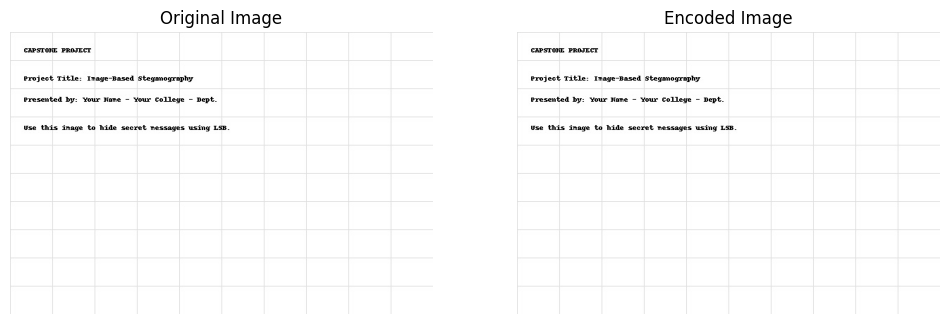


[3] Extracting hidden message...
[+] Extracting message...

[+] Extraction successful!
[+] Original message: This is a confidential cybersecurity message hidden using LSB steganography!
[+] Extracted message: This is a confidential cybersecurity message hidden using LSB steganography!

[✓] Verification: Message extracted correctly!

[4] Comparing images...


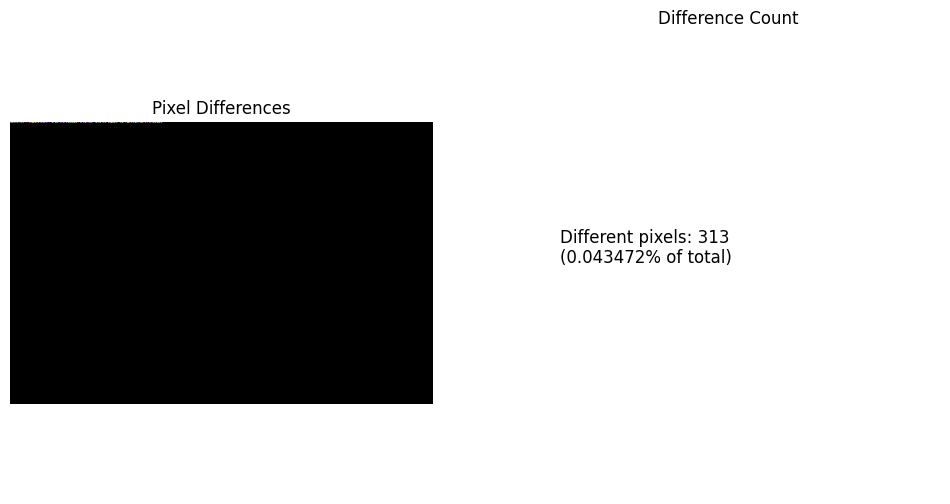

In [40]:




def message_to_binary(message):
    """Convert a string message to binary"""
    if isinstance(message, str):
        return ''.join([format(ord(i), "08b") for i in message])
    elif isinstance(message, (bytes, np.ndarray)):
        return [format(i, "08b") for i in message]
    elif isinstance(message, (int, np.uint8)):
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")

def verify_image(path):
    """Verify that an image exists and can be read"""
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")

    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Could not read image from {path}. Supported formats: JPG, PNG, BMP, etc.")
    return img

def hide_message(image_path, secret_message, output_path):
    """Hide a secret message in an image using LSB steganography"""
    # Verify and read the image
    image = verify_image(image_path)

    # Calculate maximum bytes that can be encoded
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8
    print(f"[*] Maximum bytes to encode: {n_bytes}")

    # Check if the message is too large
    if len(secret_message) > n_bytes:
        raise ValueError(f"[!] Need bigger image or smaller message. Message length: {len(secret_message)} bytes")

    # Add a delimiter to the message
    secret_message += "====="

    data_index = 0
    # Convert message to binary
    binary_secret_msg = message_to_binary(secret_message)
    data_len = len(binary_secret_msg)

    # Make a copy of the image to modify
    encoded_image = image.copy()

    # Iterate through each pixel in the image
    for row in encoded_image:
        for pixel in row:
            # Convert RGB values to binary
            r, g, b = message_to_binary(pixel)

            # Modify the least significant bit only if there is still data to store
            if data_index < data_len:
                # Red channel
                pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # Green channel
                pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # Blue channel
                pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
                data_index += 1
            # If data is encoded, break out of the loop
            if data_index >= data_len:
                break

    # Save the output image (use PNG for lossless compression)
    cv2.imwrite(output_path, encoded_image)
    print(f"[+] Image encoded successfully and saved to {output_path}")

    # Force sync with Google Drive
    !sync
    time.sleep(2)  # Wait for sync to complete

    return encoded_image

def extract_message(image_path):
    """Extract a hidden message from an image"""
    print("[+] Extracting message...")

    # Verify and read the image
    image = verify_image(image_path)

    binary_data = ""

    # Iterate through each pixel in the image
    for row in image:
        for pixel in row:
            r, g, b = message_to_binary(pixel)
            binary_data += r[-1]  # LSB of Red channel
            binary_data += g[-1]  # LSB of Green channel
            binary_data += b[-1]  # LSB of Blue channel

    # Split by 8-bits
    all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]

    # Convert from bits to characters
    decoded_message = ""
    for byte in all_bytes:
        decoded_message += chr(int(byte, 2))
        # Check for delimiter
        if decoded_message[-5:] == "=====":
            break

    return decoded_message[:-5]

def compare_images(original_path, encoded_path):
    """Compare original and encoded images with proper error handling"""
    try:
        print("\n[4] Comparing images...")

        # Verify both images exist
        original = verify_image(original_path)
        encoded = verify_image(encoded_path)

        if original.shape == encoded.shape:
            difference = cv2.absdiff(original, encoded)
            difference[difference > 0] = 255  # Highlight differences

            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.title("Pixel Differences")
            plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title("Difference Count")
            diff_count = np.count_nonzero(difference)
            total_pixels = difference.size
            plt.text(0.1, 0.5,
                    f"Different pixels: {diff_count}\n({diff_count/total_pixels:.6%} of total)",
                    fontsize=12)
            plt.axis('off')

            plt.show()
            return True
        else:
            print("[!] Images have different dimensions and cannot be compared")
            return False

    except Exception as e:
        print(f"[!] Comparison error: {str(e)}")
        return False

# Main Execution
if __name__ == "__main__":
    # Define paths
    input_image_path = "/content/drive/MyDrive/IBM/img.jpg"  # Update with your image path
    output_image_path = "/content/drive/MyDrive/IBM/encoded_image.png"


    # Secret message to hide
    secret_message = "This is a confidential cybersecurity message hidden using LSB steganography!"

    try:
        # Step 0: Verify input image exists
        print("[0] Verifying input image...")
        verify_image(input_image_path)
        print("[✓] Input image verified")

        # Step 1: Hide the message in the image
        print("\n[1] Hiding message in image...")
        encoded_image = hide_message(input_image_path, secret_message, output_image_path)

        # Additional verification of output file
        print("\n[1.5] Verifying output image was created...")
        if not os.path.exists(output_image_path):
            raise FileNotFoundError("Encoded image was not created successfully")
        print("[✓] Output image verified")

        # Step 2: Display the images
        print("\n[2] Displaying results...")
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        original_img = cv2.cvtColor(verify_image(input_image_path), cv2.COLOR_BGR2RGB)
        plt.imshow(original_img)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Encoded Image")
        encoded_img = cv2.cvtColor(verify_image(output_image_path), cv2.COLOR_BGR2RGB)
        plt.imshow(encoded_img)
        plt.axis('off')

        plt.show()

        # Step 3: Extract the message
        print("\n[3] Extracting hidden message...")
        extracted_message = extract_message(output_image_path)
        print("\n[+] Extraction successful!")
        print(f"[+] Original message: {secret_message}")
        print(f"[+] Extracted message: {extracted_message}")

        # Step 4: Verify the extraction
        if secret_message == extracted_message:
            print("\n[✓] Verification: Message extracted correctly!")
        else:
            print("\n[✗] Verification: Extracted message doesn't match original!")

        # Step 5: Compare images
        compare_images(input_image_path, output_image_path)

    except Exception as e:
        print(f"\n[!] Error occurred: {str(e)}")
        print("Troubleshooting steps:")
        print("1. Check the exact path to your image")
        print("2. Verify the image exists in Google Drive")
        print("3. Try with a simpler image path (no spaces or special characters)")
        print("4. Check the image format (try converting to PNG)")
        print("\nDebugging info:")
        print(f"Input path exists: {os.path.exists(input_image_path)}")
        print(f"Output path exists: {os.path.exists(output_image_path)}")
        if os.path.exists(input_image_path):
            print(f"Input image size: {os.path.getsize(input_image_path)} bytes")